In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the audio file
y, sr = librosa.load('../../allwavs/allvowl/extracted/trimmed/2__f__0.00000__0.05000__2__te1__agnes2_mono.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

y: [ 0.00066001  0.00100411  0.00090719 ... -0.00156178  0.00221853
  0.        ] 

y shape: (1103,) 

Sample Rate (KHz): 22050 



In [4]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.00066001  0.00100411  0.00090719 ... -0.00156178  0.00221853
  0.        ] 

Audio File shape: (1103,)


Fourier Transform of the audio file

In [5]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

/home/anfasa/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)


Spectrogram

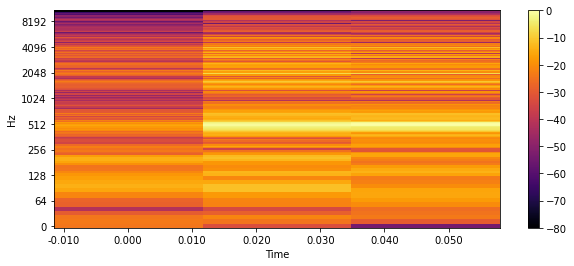

In [11]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (10, 4))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'inferno')
plt.colorbar();

Mel Spectrogram

/tmp/ipykernel_4541/2778306494.py:4: FutureWarning: Pass y=[ 0.00066001  0.00100411  0.00090719 ... -0.00156178  0.00221853
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)


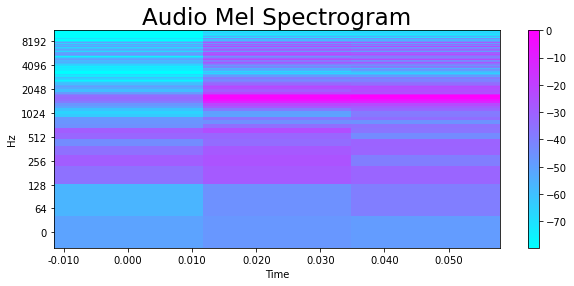

In [8]:
y, sr = librosa.load('../../allwavs/allvowl/extracted/trimmed/2__f__0.00000__0.05000__2__te1__agnes2_mono.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (10, 4))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Audio Mel Spectrogram", fontsize = 23);